In [4]:
import requests
res = requests.get('https://www.mof.gov.tw/Pages/Detail.aspx?nodeid=281&pid=72221', verify=False)
#res.text

C:\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py:821: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


In [5]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser')

In [10]:
for a in soup.select('ol ol a'):
    if '.xls' in a['href']:
        print(a['href'])

http://www.mof.gov.tw/File/Attach/72221/File_8550.xls
http://www.mof.gov.tw/File/Attach/72221/File_8552.xls
http://www.mof.gov.tw/File/Attach/72221/File_8554.xls
http://www.mof.gov.tw/File/Attach/72221/File_8556.xls
http://www.mof.gov.tw/File/Attach/72221/File_8558.xls
http://www.mof.gov.tw/File/Attach/72221/File_8560.xls
http://www.mof.gov.tw/File/Attach/72221/File_8562.xls
http://www.mof.gov.tw/File/Attach/72221/File_8564.xls
http://www.mof.gov.tw/File/Attach/72221/File_8566.xls
http://www.mof.gov.tw/File/Attach/72221/File_8568.xls
http://www.mof.gov.tw/File/Attach/72221/File_8570.xls
http://www.mof.gov.tw/File/Attach/72221/File_8572.xls
http://www.mof.gov.tw/File/Attach/72221/File_8574.xls


In [11]:
res = requests.get('http://www.mof.gov.tw/File/Attach/72221/File_8550.xls')
with open('File_8550.xls', 'wb') as f:
    f.write(res.content)

In [13]:
res2 = requests.get('http://www.comicbus.com/pics/0/103.jpg')
with open('1.jpg', 'wb') as f:    
    f.write(res2.content)

In [18]:
f = 'http://www.mof.gov.tw/File/Attach/72221/File_8550.xls'
ary = f.split('/')
ary[-1]

'File_8550.xls'

In [20]:
def fileDownload(fileurl):
    res = requests.get(fileurl)
    filename = fileurl.split('/')[-1]
    with open(filename, 'wb') as f:
        f.write(res.content)
        
fileDownload('http://www.mof.gov.tw/File/Attach/72221/File_8550.xls')

In [21]:
for a in soup.select('ol ol a'):
    if '.xls' in a['href']:
        fileDownload(a['href'])

## 完整的財政部爬蟲範例 

In [ ]:
import requests
from bs4 import BeautifulSoup

def fileDownload(fileurl):
    res = requests.get(fileurl)
    filename = fileurl.split('/')[-1]
    with open(filename, 'wb') as f:
        f.write(res.content)
        
res = requests.get('https://www.mof.gov.tw/Pages/Detail.aspx?nodeid=281&pid=72221', verify=False)
soup = BeautifulSoup(res.text, 'html.parser')
for a in soup.select('ol ol a'):
    if '.xls' in a['href']:
        fileDownload(a['href'])

## 使用Pandas 整理資料

In [23]:
import pandas
df = pandas.read_clipboard()
df

010121
0   10129
1   10130
2   10190
3   10221
4   10229

In [27]:
import pandas
df = pandas.read_excel('File_8550.xls', skiprows=range(0,5), skip_footer= 4)
df

Unnamed: 0  Unnamed: 1      年 增 率  Unnamed: 3    年 增 率.1  Unnamed: 5  \
0         95年   225904.20  13.087276   206442.28  11.327098    19461.92   
1         96年   248792.02  10.131649   223115.39   8.076404    25676.63   
2         97年   258051.43   3.721748   244466.73   9.569640    13584.70   
3         98年   205662.50 -20.301740   177597.78 -27.352986    28064.72   
4         99年   278008.16  35.176883   256274.04  44.300247    21734.12   
5        100年   312922.86  12.558876   288062.20  12.403975    24860.66   
6        101年   306409.15  -2.081570   277323.84  -3.727794    29085.31   
7        102年   311428.01   1.637958   278009.70   0.247312    33418.31   
8        103年   320092.05   2.782039   281849.71   1.381251    38242.35   
9        104年   285343.56 -10.855781   237219.13 -15.834885    48124.43   
10        10月    24450.48 -10.674321    18714.54 -18.790434     5735.94   
11        11月    22604.71 -17.159557    20457.52 -11.448331     2147.19   
12        12月    22548.66 -13.786468    18402.04 -14.925375     4146.63   
13  105年1-10月   229376.96  -4.501941   189042.92  -4.696848    40334.04   
14         1月    22191.51 -12.943137    18676.28 -11.519401     3515.23   
15         2月    17755.31 -11.975953    13617.14 -13.178700     4138.17   
16         3月    22720.76 -11.395732    18220.19 -16.945355     4500.57   
17         4月    22244.08  -6.544247    17445.19  -9.590280     4798.89   
18         5月    23539.20  -9.549002    20035.21  -3.366100     3503.99   
19         6月    22867.85  -2.210321    19300.72 -10.028053     3567.13   
20         7月    24095.78   1.102537    20516.15  -0.135775     3579.64   
21         8月    24653.07   0.986231    20673.52  -0.781766     3979.55   
22         9月    22560.03  -1.822950    18185.85   0.728171     4374.18   
23        10月    26749.38   9.402288    22372.68  19.547069     4376.70   

       年 增 率.2  
0    35.875458  
1    31.932657  
2   -47.093131  
3   106.590667  
4   -22.557140  
5    14.385367  
6    16.993338  
7    14.897547  
8    14.435309  
9    25.840685  
10   32.545081  
11  -48.689409  
12   -8.341011  
13   -3.577694  
14  -19.799518  
15   -7.771688  
16   21.460774  
17    6.499491  
18  -33.776412  
19   84.557744  
20    8.837452  
21   11.288183  
22  -11.175885  
23  -23.696868

In [29]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', '年 增 率', 'Unnamed: 3', '年 增 率.1',
       'Unnamed: 5', '年 增 率.2'],
      dtype='object')

In [30]:
df.columns = ['yearmonth','importation','importation_annual','exportation','exportation_annual','import_export','import_export_annual']
df.columns

Index(['yearmonth', 'importation', 'importation_annual', 'exportation',
       'exportation_annual', 'import_export', 'import_export_annual'],
      dtype='object')

In [37]:
df

yearmonth  importation  importation_annual  exportation  \
0         95年    225904.20           13.087276    206442.28   
1         96年    248792.02           10.131649    223115.39   
2         97年    258051.43            3.721748    244466.73   
3         98年    205662.50          -20.301740    177597.78   
4         99年    278008.16           35.176883    256274.04   
5        100年    312922.86           12.558876    288062.20   
6        101年    306409.15           -2.081570    277323.84   
7        102年    311428.01            1.637958    278009.70   
8        103年    320092.05            2.782039    281849.71   
9        104年    285343.56          -10.855781    237219.13   
10        10月     24450.48          -10.674321     18714.54   
11        11月     22604.71          -17.159557     20457.52   
12        12月     22548.66          -13.786468     18402.04   
13  105年1-10月    229376.96           -4.501941    189042.92   
14         1月     22191.51          -12.943137     18676.28   
15         2月     17755.31          -11.975953     13617.14   
16         3月     22720.76          -11.395732     18220.19   
17         4月     22244.08           -6.544247     17445.19   
18         5月     23539.20           -9.549002     20035.21   
19         6月     22867.85           -2.210321     19300.72   
20         7月     24095.78            1.102537     20516.15   
21         8月     24653.07            0.986231     20673.52   
22         9月     22560.03           -1.822950     18185.85   
23        10月     26749.38            9.402288     22372.68   

    exportation_annual  import_export  import_export_annual  
0            11.327098       19461.92             35.875458  
1             8.076404       25676.63             31.932657  
2             9.569640       13584.70            -47.093131  
3           -27.352986       28064.72            106.590667  
4            44.300247       21734.12            -22.557140  
5            12.403975       24860.66             14.385367  
6            -3.727794       29085.31             16.993338  
7             0.247312       33418.31             14.897547  
8             1.381251       38242.35             14.435309  
9           -15.834885       48124.43             25.840685  
10          -18.790434        5735.94             32.545081  
11          -11.448331        2147.19            -48.689409  
12          -14.925375        4146.63             -8.341011  
13           -4.696848       40334.04             -3.577694  
14          -11.519401        3515.23            -19.799518  
15          -13.178700        4138.17             -7.771688  
16          -16.945355        4500.57             21.460774  
17           -9.590280        4798.89              6.499491  
18           -3.366100        3503.99            -33.776412  
19          -10.028053        3567.13             84.557744  
20           -0.135775        3579.64              8.837452  
21           -0.781766        3979.55             11.288183  
22            0.728171        4374.18            -11.175885  
23           19.547069        4376.70            -23.696868

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


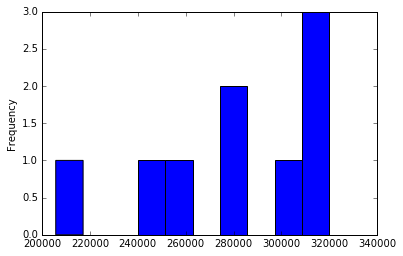

In [36]:
%pylab inline
df.ix[1:9,"importation"].plot(kind='hist')